In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
# import k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
# Train-Test split
from sklearn.model_selection import train_test_split
# Accuarcy Score
from sklearn.metrics import accuracy_score
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# The data set
titanic_train = pd.read_csv("titanic_train.csv")
titanic_test = pd.read_csv("titanic_test.csv")
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


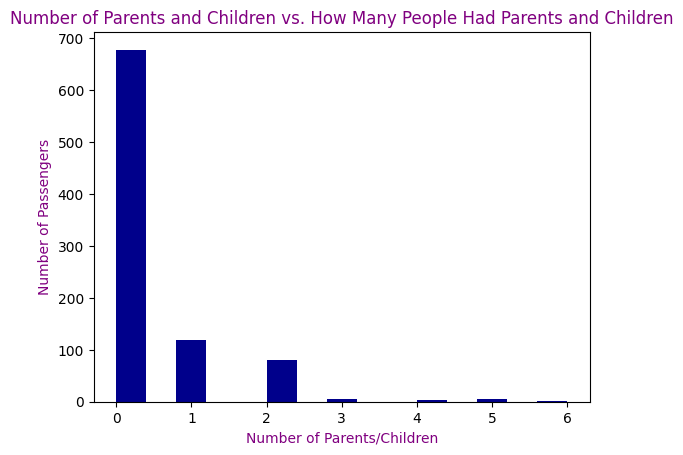

In [30]:
# A histogram of the numercial column Parch
titanic_train.hist("Parch", bins=15, grid=False, color="darkblue")
plt.xlabel("Number of Parents/Children", color = "purple")
plt.ylabel("Number of Passengers", color = "purple")
plt.title("Number of Parents and Children vs. How Many People Had Parents and Children", color = "purple")
plt.savefig("figure1.png")
plt.show()


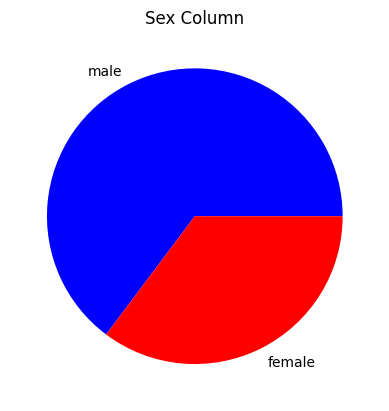

In [29]:
# A pie chart for the sex column
sex_pie = titanic_train["Sex"].value_counts()
pie_colors = ["Blue", "Red"]
plt.pie(sex_pie, labels = sex_pie.index, colors = pie_colors)
plt.title("Sex Column")
plt.savefig("figure2.png")
plt.show()


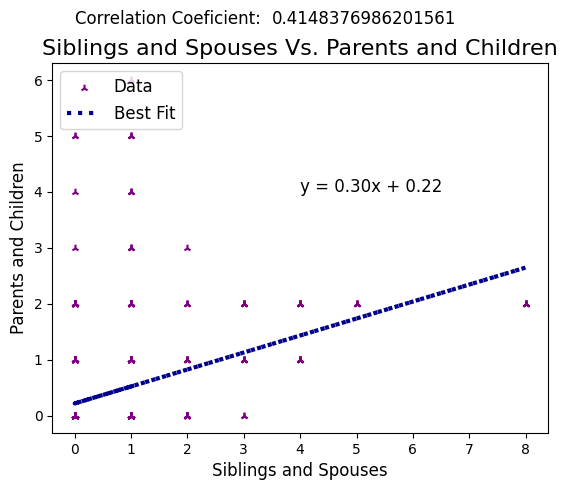

In [46]:
# A scatter plot of two numerical columns of data
SibSp = titanic_train.SibSp
Parch = titanic_train.Parch

## Creating a linear regression model
linear_model = scipy.stats.linregress(SibSp, Parch)
slope = linear_model.slope
y_int = linear_model.intercept
linear_fit = slope*age + y_int

plt.scatter(SibSp, Parch, s = 30, color = "purple", marker = "2", label = "Data")
plt.plot(SibSp, linear_fit, linewidth = 3, color = "darkblue", linestyle = ":", label = "Best Fit")
plt.title("Siblings and Spouses Vs. Parents and Children", fontsize = 16)
plt.xlabel("Siblings and Spouses", fontsize = 12)
plt.ylabel("Parents and Children", fontsize = 12)
plt.legend(fontsize = 12, loc = "upper left")

# correlation
corr = scipy.stats.pearsonr(SibSp, Parch)
plt.text(4, 4, f'y = {slope:.2f}x + {y_int:.2f}', fontsize = 12)
plt.text(3.5, 7, corr[0], fontsize = 12)
plt.text(0, 7, "Correlation Coeficient:", fontsize = 12)
plt.savefig("figure3.png")

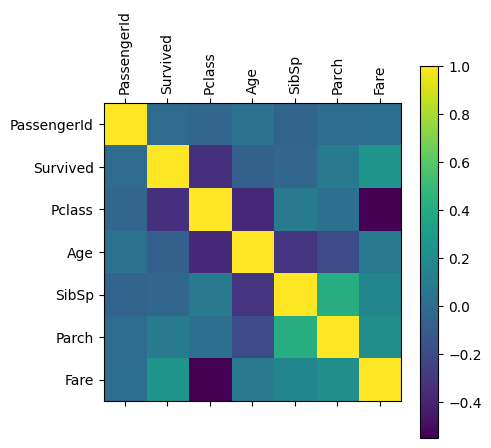

In [31]:
# Correlation Scores in relation to each other column
corr_scores = titanic_train.corr(numeric_only = True)
num_labels = len(corr_scores.index)
# Create the color chart to show relations
plt.matshow(corr_scores)
plt.xticks(ticks = range(num_labels), labels = corr_scores.index, rotation = 90)
plt.yticks(ticks = range(num_labels), labels = corr_scores.index)
plt.colorbar()
plt.savefig("figure4.png")
plt.show()


In [21]:
# A contingency table comparing two categorical columns
contingency = pd.crosstab(titanic_train["Pclass"], titanic_train["Sex"])
print(contingency)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


In [22]:
c, p, dof, expected = scipy.stats.chi2_contingency(contingency)
print("The P-value is:", p)
print("since the p value is less than 0.05 then we can reject the null hypothesis and say that there is a realation between the Pclass and sex")

The P-value is: 0.00020638864348233114
since the p value is less than 0.05 then we can reject the null hypothesis and say that there is a realation between the Pclass and sex


In [23]:
# Identify at least two sets of numerical that it makes sense to compare against one another
fares_1 = titanic_train.query("Pclass==1")['Fare']
print(fares_1)

1      71.2833
3      53.1000
6      51.8625
11     26.5500
23     35.5000
        ...   
871    52.5542
872     5.0000
879    83.1583
887    30.0000
889    30.0000
Name: Fare, Length: 216, dtype: float64
